31.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



112.7%


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

====== Epoch:  1 / 10 ======
Batch:  1/6  Loss: 2.301782
Batch:  2/6  Loss: 2.371244
Batch:  3/6  Loss: 2.284659
Batch:  4/6  Loss: 2.019494
Batch:  5/6  Loss: 1.902302
Batch:  6/6  Loss: 1.752165
Accuracy: 56.35%
elapsed time: 4.326706409454346
====== Epoch:  2 / 10 ======
Batch:  1/6  Loss: 1.447248
Batch:  2/6  Loss: 1.274765
Batch:  3/6  Loss: 1.047628
Batch:  4/6  Loss: 0.937513
Batch:  5/6  Loss: 0.886365
Batch:  6/6  Loss: 0.877928
Accuracy: 79.84%
elapsed time: 4.312291622161865
====== Epoch:  3 / 10 ======
Batch:  1/6  Loss: 0.684300
Batch:  2/6  Loss: 0.757608
Batch:  3/6  Loss: 0.646008
Batch:  4/6  Loss: 0.566499
Batch:  5/6  Loss: 0.474588
Batch:  6/6  Loss: 0.508160
Accuracy: 88.16%
elapsed time: 4.2746992111206055
====== Epoch:  4 / 10 ======
Batch:  1/6  Loss: 0.431508
Batch:  2/6  Loss: 0.364945
Batch:  3/6  Loss: 0.367566
Batch:  4/6  Loss: 0.354939
Batch:  5/6  Loss: 0.317177
Batch:  6

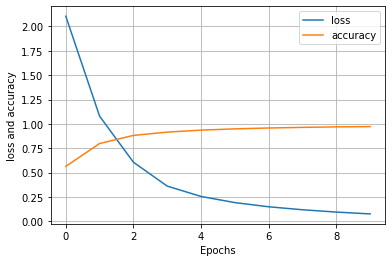

In [1]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
import time

mnist_train = datasets.MNIST(root='MNIST_data/',
                             train=True,
                             transform=transforms.ToTensor(),
                             download=True)
mnist_test = datasets.MNIST(root='MNIST_data/',
                             train=False,
                             transform=transforms.ToTensor(),
                             download=True)

BATSIZE = 10000
train_loader = DataLoader(dataset=mnist_train,
                          batch_size=BATSIZE,
                          shuffle=True)
test_loader = DataLoader(dataset=mnist_test,
                          batch_size=len(mnist_test),
                          shuffle=False)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(784, 1024)
        self.fc2 = torch.nn.Linear(1024, 512)
        self.fc3 = torch.nn.Linear(512, 256)
        self.fc4 = torch.nn.Linear(256, 128)
        self.fc5 = torch.nn.Linear(128, 10)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        z = self.fc5(x)
        return z

net = Net()

cel = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

EPOCHS = 10
loss_lst = []
acc_lst = []

start_time = time.time()
for epoch in range(EPOCHS):
    batch_time = time.time()
    print(f'====== Epoch: {epoch+1:2d} / {EPOCHS} ======')

    net.train()
    l_sum = 0
    for batch_idx, (x,y) in enumerate(train_loader):
        z = net(x)
        loss = cel(z, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        l_sum += loss.item()
        print(f'Batch: {batch_idx+1:2d}/{len(train_loader)} ',
              f'Loss: {loss.item():0.6f}')        
    loss_lst.append(l_sum/len(train_loader))

    net.eval()
    correct = 0
    for batch_idx, (x,y) in enumerate(test_loader):
        z = net(x)
        yhat = torch.argmax(z, dim=1)
        correct += torch.sum(y==yhat)
    
    accuracy = correct / len(mnist_test)
    acc_lst.append(accuracy)
    print(f'Accuracy: {accuracy.item()*100:0.2f}%')
    print("elapsed time:", time.time() - batch_time)
        
print("elapsed time:", time.time() - start_time)
plt.plot(range(EPOCHS), loss_lst)
plt.plot(range(EPOCHS), acc_lst)
plt.xlabel('Epochs')
plt.ylabel('loss and accuracy')
plt.legend(['loss', 'accuracy'])
plt.grid(True)
plt.show()